In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from typing import cast
from typing import Tuple


In [2]:
def preprocess_image(image_path: str) -> Tuple[torch.Tensor, Image.Image]:
		transform = transforms.Compose([
				transforms.Resize((128, 128)),
				transforms.ToTensor(),
				transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
		])
		pil_image: Image.Image = Image.open(image_path).convert("RGB")
		tensor = cast(torch.Tensor, transform(pil_image))
		return tensor.unsqueeze(0), pil_image


In [3]:
def load_model(model_path: str, num_classes: int) -> nn.Module:
    model = models.resnet18(weights=None)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    model.eval()
    return model


In [4]:
def run_inference(image_path: str, model_path: str, class_names: list) -> None:
    image_tensor, pil_image = preprocess_image(image_path)
    model = load_model(model_path, num_classes=len(class_names))

    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.softmax(outputs, dim=1)
        conf, predicted_idx = torch.max(probs, 1)

    predicted_label = class_names[int(predicted_idx)]
    confidence = conf.item() * 100

    # Show result
    plt.figure(figsize=(5, 5))
    plt.imshow(pil_image)
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print probabilities
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {probs[0, i].item():.2%}")


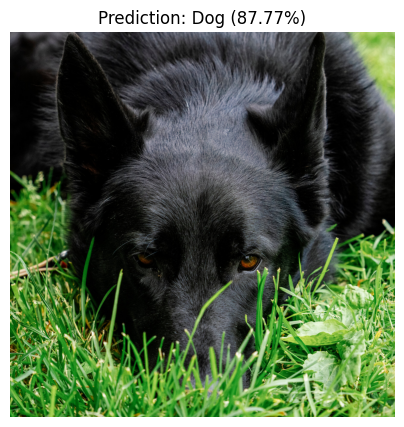

Cat: 12.23%
Dog: 87.77%


In [5]:
# Example usage:
image_path = "../data/predict/10HS-DOG-EMOTIONS-jtzp-mediumSquareAt3X.jpg"
model_path = "../catvsdog_model.pth"
class_names = ["Cat", "Dog"]

run_inference(image_path, model_path, class_names)
